# Análise Fatorial Exploratória

Nesta atividade iremos trabalho com um conjunto de dados od [ifood](https://www.kaggle.com/datasets/jackdaoud/marketing-data). Este conjunto sofreu um pre tratamento para podermos focar mais na análise fatorial.

In [1]:
# BIBLIOTECAS IMPORTADAS
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)

## Atividade 1: Importe os dados e verifique se há dados faltantes. Se houver dados faltantes, faça os tratamentos adequados.

In [3]:
# seu código
df = pd.read_excel('ifood2 - base.xlsx')

In [4]:
df.shape

(2236, 21)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2236.0,5591.551878,3245.240106,0.00,2828.25,5458.50,8427.75,11191.00
ano_nascimento,2236.0,1968.796512,11.980604,1893.00,1959.00,1970.00,1977.00,1996.00
renda_mensal,2236.0,19632.809070,9442.935676,650.38,13245.68,19286.09,25739.94,250626.32
num_filhos_pequenos,2236.0,0.444991,0.538551,0.00,0.00,0.00,1.00,2.00
num_filhos_adolescentes,2236.0,0.506261,0.544615,0.00,0.00,0.00,1.00,2.00
num_dias_primeira_compra,2236.0,353.335868,202.064179,0.00,180.75,355.00,528.00,699.00
num_dias_ultima_compra,2236.0,49.147138,28.954880,0.00,24.00,49.00,74.00,99.00
gasto_vinho_ult_2anos,2236.0,303.873435,336.876776,0.00,23.00,173.00,505.00,1493.00
gasto_prod_frutas_ult_2anos,2236.0,26.271020,39.761356,0.00,1.00,8.00,33.00,199.00
gasto_prod_carne_ult_2anos,2236.0,166.924419,225.778550,0.00,16.00,67.00,232.00,1725.00


In [6]:
# seu código
df.isnull().sum()

ID                              0
ano_nascimento                  0
nivel_educacao                  0
estado_civil                    0
renda_mensal                    0
num_filhos_pequenos             0
num_filhos_adolescentes         0
num_dias_primeira_compra        0
num_dias_ultima_compra          0
gasto_vinho_ult_2anos           0
gasto_prod_frutas_ult_2anos     0
gasto_prod_carne_ult_2anos      0
gasto_prod_peixe_ult_2anos      0
gasto_prod_doces_ulti_2anos     0
qtde_compras_desconto           0
qtde_compras_web_restaurante    0
qtde_compras_catalogo           0
qtde_compras_loja               0
qtde_vistas_web_ult_mes         0
aceitou_qtde_oferta             0
reclamou_ult_2anos              0
dtype: int64

## Atividade 2: Faça uma preparação dos dados, isto é, elimine colunas irrelevantes e transforme colunas categóricas ordinais.

In [7]:
# Removendo colunas não ordinais
df_new = df.drop(columns=['ID','estado_civil','reclamou_ult_2anos'])

In [8]:
# seu código
df_new.nivel_educacao.unique()

array(['graduado', 'doutorado', 'mestrado', 'ensino_medio', 'pos'],
      dtype=object)

In [9]:
# seu código
nivel_educacao = {
    'graduado':2
    , 'doutorado':5
    , 'mestrado':4
    , 'ensino_medio':1
    , 'pos':3
}

In [10]:
# seu código
df_new.nivel_educacao = df_new.nivel_educacao.map(nivel_educacao)

## Atividade 3: Coloque os dados numa mesma escala e faça um heatmap para observar a correlação.

In [11]:
# instanciando a função
scaler = StandardScaler()

# criando uma cópia dos valores
df_scaled = df_new.copy()

# aplicando a padronização
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

df_scaled.head()

,ano_nascimento,nivel_educacao,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,gasto_prod_frutas_ult_2anos,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta
0,0.183962,-0.819614,-2.010675,-0.826459,-0.929785,-1.541122,0.547625,-0.899264,-0.635710,-0.726203,-0.668911,-0.631638,6.562937,-1.469078,-0.910659,-1.779682,6.056590,-0.501375
1,0.851858,-0.819614,-1.982125,1.030790,-0.929785,0.919043,-0.246892,-0.899264,-0.635710,6.902445,-0.668911,-0.631638,6.562937,-1.469078,8.678058,-1.779682,-1.781003,-0.501375
2,0.350936,-0.819614,-1.940113,1.030790,-0.929785,0.438890,0.236727,-0.896295,-0.635710,-0.735063,-0.687285,-0.655856,-1.202564,-1.469078,-0.910659,-1.779682,3.581561,-0.501375
3,-0.483933,1.530950,-1.919366,1.030790,0.906787,-1.719323,-0.695967,-0.887388,-0.660865,-0.735063,-0.668911,-0.631638,6.562937,-1.469078,-0.910659,-1.779682,5.644085,-0.501375
4,0.016989,-0.819614,-1.903240,-0.826459,0.906787,-0.427365,-1.697749,-0.854727,-0.560242,-0.686332,-0.650537,-0.558984,-1.202564,7.526593,-0.910659,-1.779682,-1.781003,-0.501375


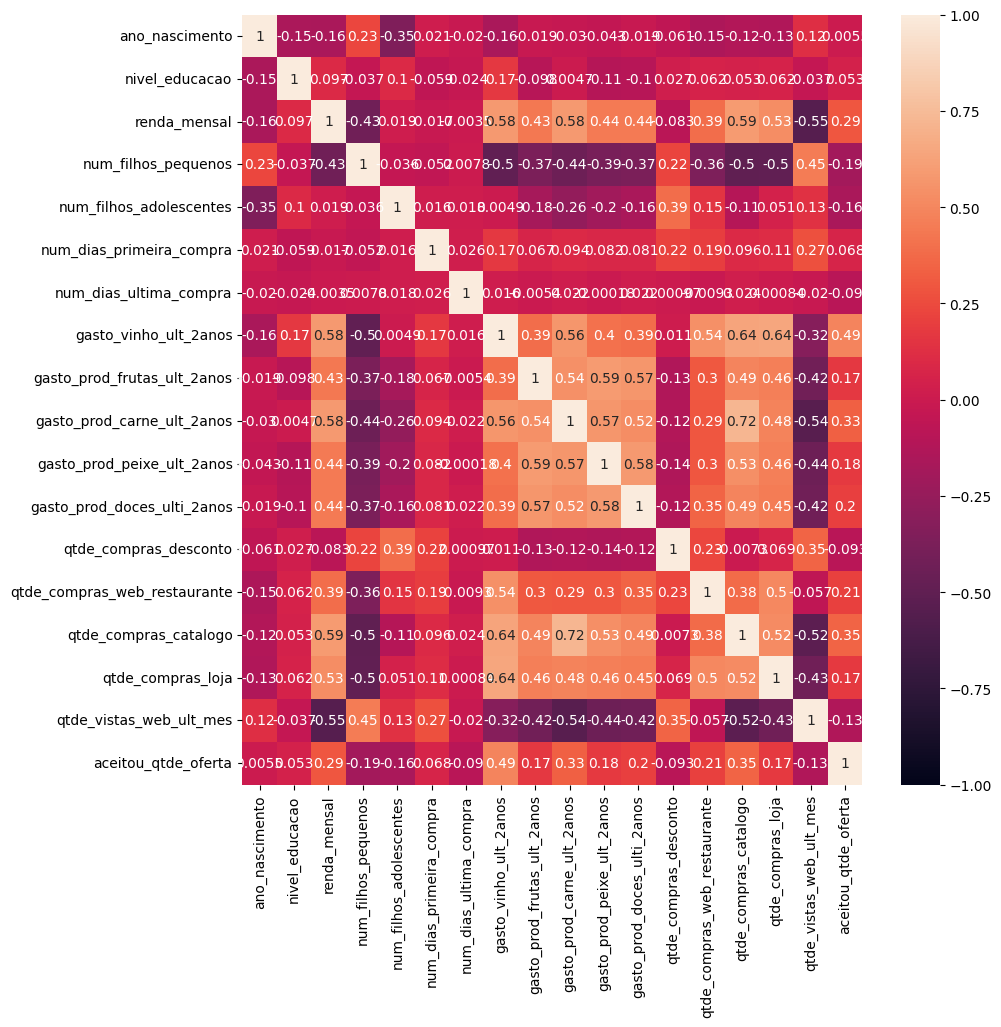

In [12]:
# importando seaborn e plotando heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_scaled.corr(), vmin=-1, vmax=1, annot=True);

## Atividade 4: Há um grupo de variáveis que trazem informações muito parecidas e possuem correlação entre si. Transforme todas essas variáveis em uma única.

In [13]:
# seu código
df_new['total_filhos'] = df_new['num_filhos_pequenos'] + df_new['num_filhos_adolescentes']
df_new['gasto_total'] = df_new[['gasto_vinho_ult_2anos', 'gasto_prod_frutas_ult_2anos',
       'gasto_prod_carne_ult_2anos', 'gasto_prod_peixe_ult_2anos',
       'gasto_prod_doces_ulti_2anos']].sum(axis=1)
df_new.head(3)

,ano_nascimento,nivel_educacao,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,gasto_prod_frutas_ult_2anos,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta,total_filhos,gasto_total
0,1971,2,650.38,0,0,42,65,1,1,3,1,1,15,0,0,0,20,0,0,7
1,1979,2,919.92,1,0,539,42,1,1,1725,1,1,15,0,28,0,1,0,1,1729
2,1973,2,1316.54,1,0,442,56,2,1,1,0,0,0,0,0,0,14,0,1,4


In [14]:
df_new_2 = df_new.drop(columns=['gasto_vinho_ult_2anos', 'gasto_prod_frutas_ult_2anos',
       'gasto_prod_carne_ult_2anos', 'gasto_prod_peixe_ult_2anos',
       'gasto_prod_doces_ulti_2anos','num_filhos_pequenos', 'num_filhos_adolescentes'] )


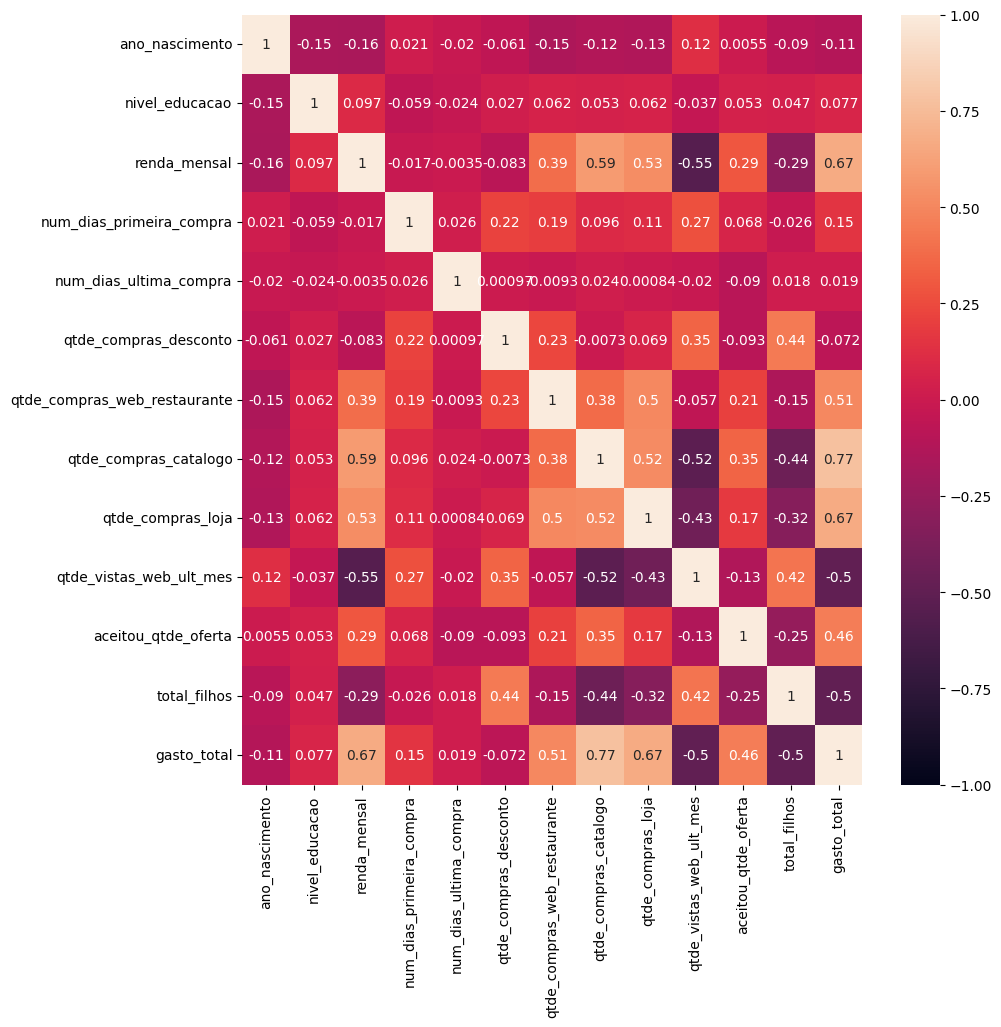

In [15]:
# instanciando a função
scaler = StandardScaler()

# criando uma cópia dos valores
df_scaled = df_new_2.copy()

# aplicando a padronização
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

# plotando heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_scaled.corr(), vmin=-1, vmax=1, annot=True);

## Atividade 5: Faça e teste de esfericidade de Bartlett e conclua se as variáveis estão correlacionadas.

Para realizar esse teste em `Python` usaremos a função `calculate_bartlett_sphericity` do pacote `factor_analyzer`.

**Atenção!** Este pacote não vem instalado por padrão! Para instalá-lo use o comando `!pip install factor_analyzer`.

A função que desejamos está no pacote `factor_analyzer` dentro do módulo `factor_analyzer`.

Para mais detalhes consulte a documentação do pacote [aqui](https://factor-analyzer.readthedocs.io/en/latest/index.html).

Está função retornará para nós dois valores: a estatística qui quadrado do teste e o p-valor. Consideraremos um nível de significância de 5%.

In [16]:
# Retorna um q_quadrado e um P_valor

chi_squared, p_valor = calculate_bartlett_sphericity(df_scaled)

p_valor

# Com esse valor de p_valor igual a zero(0) podemos rejeitar a hipotese nula

0.0

## Atividade 6: Obtenha a medida de Kaiser-Meyer-Olkin e conclua se a análise fatorial é indicada.

Pequenos valores de KMO indicam que as correlações entre os pares de variáveis não podem ser explicadas por outras variáveis, indicando que a análise fatorial não é adequada.
KMO sempre varia entre 0 e 1, quanto maior melhor. Resultados abaixo de 0.5 indicam que análise fatorial não é adequada.

In [17]:
# Retorna o calculate_kmo

kmo_all, kmo_model = calculate_kmo(df_scaled)

kmo_model

0.7931727533499676

## Atividade 7: Encontre o número adequado de fatores para este problema.

Para isso vamos usar a função `FactorAnalyzer` e o método `get_eigenvalues()` aplicado ao um objeto da classe `FactorAnalyzer`, após este calcular valores dos dados.

O método `get_eigenvalues()` retorna dois objetos, sendo que o primeiro são os autovalores.

In [18]:
# Instanciando a função FactorAnalyzer
fa = FactorAnalyzer(rotation= None)

In [19]:
# Descobrindo os altos valores padronizando os dados
fa.fit(df_scaled)

ev, v = fa.get_eigenvalues()
ev

array([4.08909657, 1.78009726, 1.2819758 , 1.06687003, 0.92121427,
       0.81304619, 0.77880082, 0.62550624, 0.48325118, 0.41813485,
       0.3116751 , 0.27315779, 0.15717392])

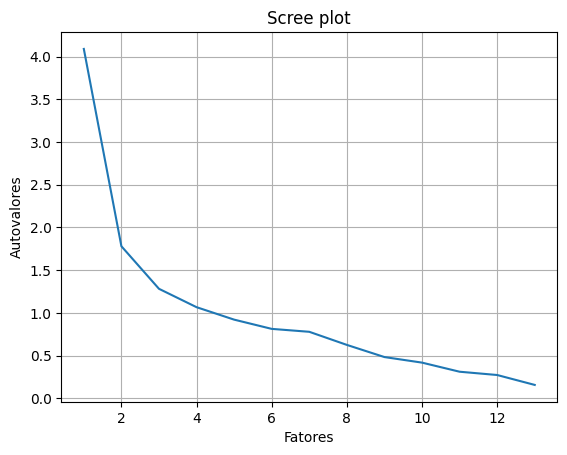

In [20]:
sns.lineplot(x= range(1, df_scaled.shape[1] + 1), y= ev)
plt.title('Scree plot')
plt.xlabel('Fatores')
plt.ylabel('Autovalores')
plt.grid();

## Atividade 8: Calcule a variância explicada acumulada.

Para isso vamos usar o método `get_factor_variance()` aplicado ao nosso objetivo usado na realizaação da análise fatorial.

In [21]:
# recriando o nosso " fa "

fa = FactorAnalyzer(n_factors= 4, rotation= None)
fa.fit(df_scaled)

colunas = []
for i in range(4):
  colunas.append('Fator ' + str(i))

variancia_fator = pd.DataFrame(fa.get_factor_variance(),
                               index=['variancia','variancia proporcional','variancia acumulada'],
                               columns= colunas)

variancia_fator


,Fator 0,Fator 1,Fator 2,Fator 3
variancia,3.781525,1.316588,0.714877,0.396334
variancia proporcional,0.290887,0.101276,0.054991,0.030487
variancia acumulada,0.290887,0.392162,0.447153,0.477640


## Atividade 9: Rotacione os fatores.

Como estamos trabalhando com fatores que influenciam cliente, é interessante não ter um número muito grande, por isso vamos usar 4 fatores na análise a seguir.

Esse processo pode ser feito de forma simples ao passar para a função `FactorAnalyzer()` os parâmetros de interesse, que no nosso caso são `n_factors` e `rotation='varimax`.

Após expor nosso objeto aos dados, vamos acessar o atributo `loadinds_` que possui as cargas fatoriais.

In [22]:
# Instaciando a FatorAnalyzer
fa = FactorAnalyzer(n_factors= 4, rotation= 'varimax')

fa.fit(df_scaled)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [23]:
cargas_fat = pd.DataFrame(fa.loadings_,
             index= df_scaled.columns,
             columns= colunas)

cargas_fat

,Fator 0,Fator 1,Fator 2,Fator 3
ano_nascimento,-0.135358,0.012542,-0.295261,0.046650
nivel_educacao,0.057714,-0.028327,0.210473,0.070125
renda_mensal,0.708958,-0.160137,0.242668,0.086095
num_dias_primeira_compra,0.126711,0.465653,-0.143265,0.022697
num_dias_ultima_compra,0.017658,0.004026,-0.007856,-0.120968
qtde_compras_desconto,-0.059267,0.577120,0.358639,-0.129972
qtde_compras_web_restaurante,0.546394,0.373755,0.150289,0.004031
qtde_compras_catalogo,0.777116,-0.042316,0.063503,0.130087
qtde_compras_loja,0.749018,0.097011,0.111635,-0.144335
qtde_vistas_web_ult_mes,-0.599016,0.684711,-0.137072,0.117113


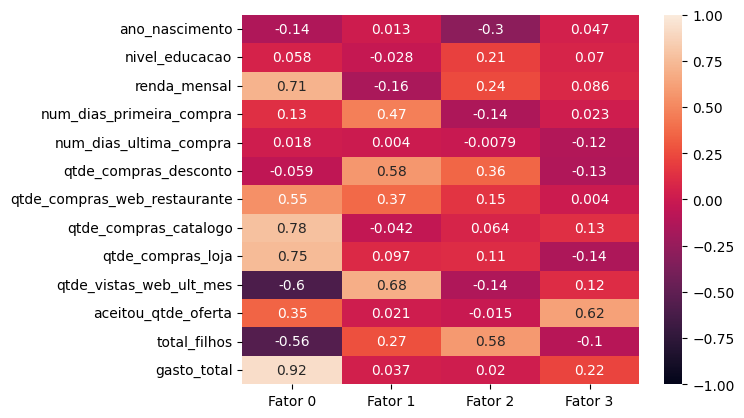

In [24]:
sns.heatmap(cargas_fat, vmin= -1, vmax= 1, annot= True);

## Atividade 10: Obtenha a relação de cada fator com as variáveis que ele está influenciando.

Cargas fatoriais indicam quanto um fator explica uma variável. Esses valores variam de -1 a 1. Quanto mais próximo de -1 ou de 1, mais o fator explica a variável.

Vamos estabelecer um valor de corte para poder entender quais fatores explicam quais variáveis. Vamos considerar que esse valor de corte será 0.5.

In [25]:
fatores = {}
for i in range(4):
  fatores['Fator ' + str(i)] = cargas_fat[abs(cargas_fat.iloc[:,i]) > 0.5].iloc[:,i].index.tolist()

fatores


{'Fator 0': ['renda_mensal',
  'qtde_compras_web_restaurante',
  'qtde_compras_catalogo',
  'qtde_compras_loja',
  'qtde_vistas_web_ult_mes',
  'total_filhos',
  'gasto_total'],
 'Fator 1': ['qtde_compras_desconto', 'qtde_vistas_web_ult_mes'],
 'Fator 2': ['total_filhos'],
 'Fator 3': ['aceitou_qtde_oferta']}

## Atividade 11: Encontre um nome que represente cada fator.


* Fator 0: "Perfil de Consumo"
* Fator 1: "Engajamento em Ofertas"
* Fator 2: "Total de Filhos"
* Fator 3: "Aceitação de Ofertas"